<a href="https://colab.research.google.com/github/Latamila/Quem_sobreviveria_Titanic/blob/main/Quem_sobreviveria_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip uninstall scikit-learn

In [ ]:
!pip install scikit-learn==1.2.2

In [ ]:
import sklearn

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn import preprocessing

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline


In [ ]:
from google.colab import files

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
uploaded = files.upload()

Saving Titanic (1).csv to Titanic (1).csv


In [ ]:
titanic_data = pd.read_csv('Titanic (1).csv')

In [ ]:
titanic_data.head(5)

,last,first,gender,age,class,fare,embarked,survived
0,Braund,Mr. Owen Harris,M,22.0,3,7.2500,Southampton,no
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),F,38.0,1,71.2833,Cherbourg,yes
2,Heikkinen,Miss Laina,F,26.0,3,7.9250,Southampton,yes
3,Futrelle,Mrs. Jacques Heath (Lily May Peel),F,35.0,1,53.1000,Southampton,yes
4,Allen,Mr. William Henry,M,35.0,3,8.0500,Southampton,no


In [ ]:
str(len(titanic_data.index))

'891'

<Axes: xlabel='survived', ylabel='count'>

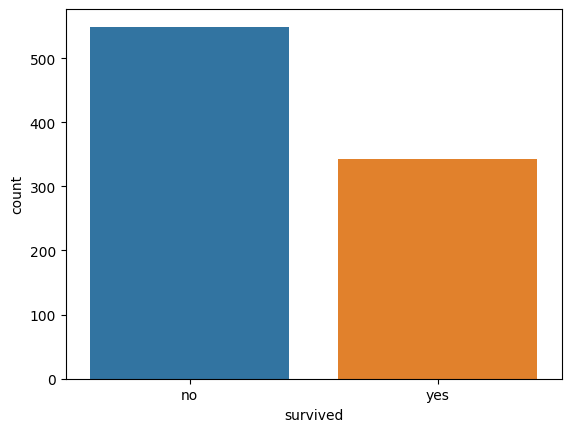

In [ ]:
#Analisando os dados
sns.countplot(x='survived',data=titanic_data)

Sem ver os dados, já que pouco mais de 300 sobreviveram e mais de 500 morreram

<Axes: xlabel='survived', ylabel='count'>

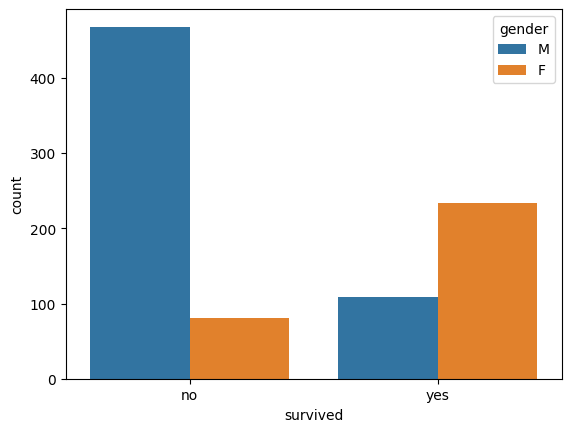

In [ ]:
sns.countplot(x='survived', hue='gender', data = titanic_data)

Sobreviveram muito mais Mulheres e morreram mais homens.

<Axes: xlabel='survived', ylabel='count'>

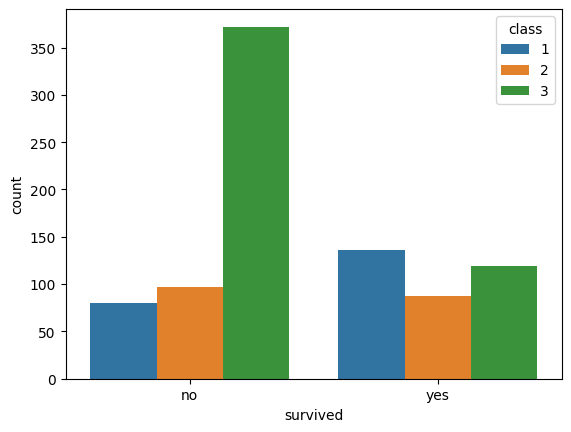

In [ ]:
sns.countplot(x='survived', hue='class', data = titanic_data)


Entre os que sobreviveram, os integrantes da primeira e terceira classe predominaram. Ao passo que, entre os que morreram, predominaram mais os integrantes da terceira classe.

<Axes: ylabel='Frequency'>

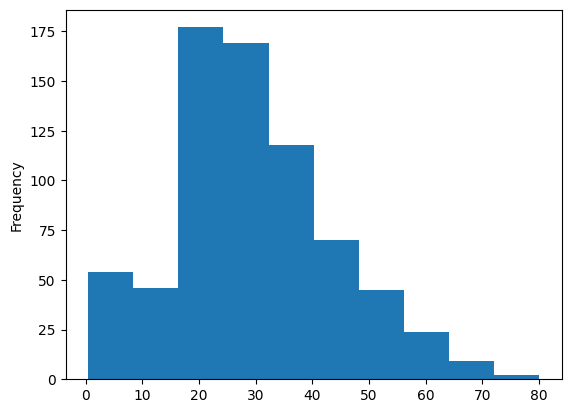

In [ ]:
titanic_data['age'].plot.hist()

Predominantemente, havia mais passageiros entre 20 a 40 anos

<Axes: ylabel='Frequency'>

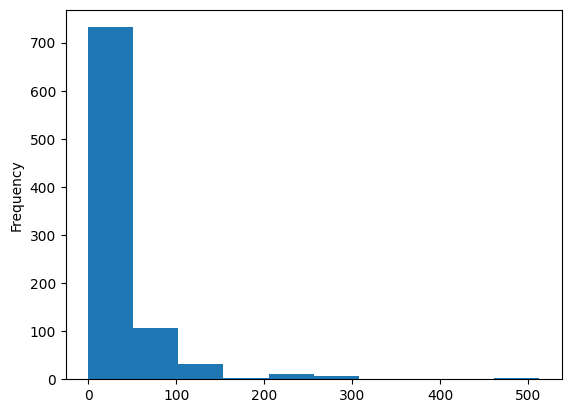

In [ ]:
titanic_data['fare'].plot.hist()

In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   last      891 non-null    object 
 1   first     891 non-null    object 
 2   gender    891 non-null    object 
 3   age       714 non-null    float64
 4   class     891 non-null    int64  
 5   fare      891 non-null    float64
 6   embarked  891 non-null    object 
 7   survived  891 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 55.8+ KB


#DATA WRANGLING

In [ ]:
titanic_data.isnull()

,last,first,gender,age,class,fare,embarked,survived
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False
889,False,False,False,False,False,False,False,False


In [ ]:
titanic_data.isnull().sum()

last          0
first         0
gender        0
age         177
class         0
fare          0
embarked      0
survived      0
dtype: int64

#MAPA DE CALOR COM O DATASET, SUAS COLUNAS E DADOS FALTANTES

<Axes: >

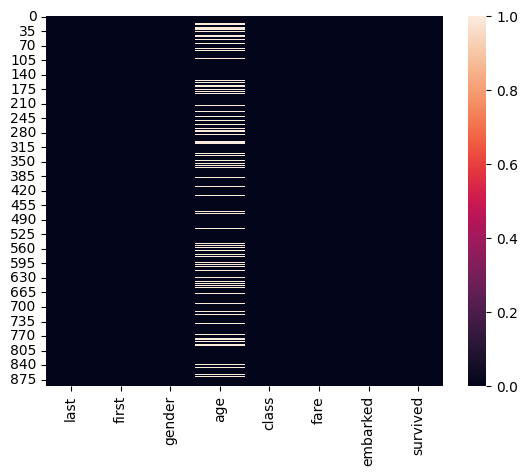

In [ ]:
sns.heatmap(titanic_data.isnull())

<Axes: >

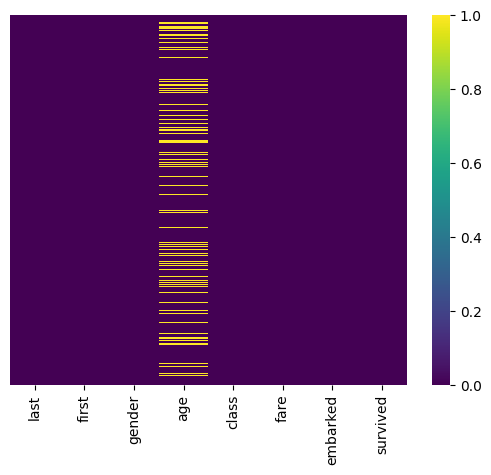

In [ ]:
sns.heatmap(titanic_data.isnull(),yticklabels=False, cmap='viridis')


<Axes: xlabel='class', ylabel='age'>

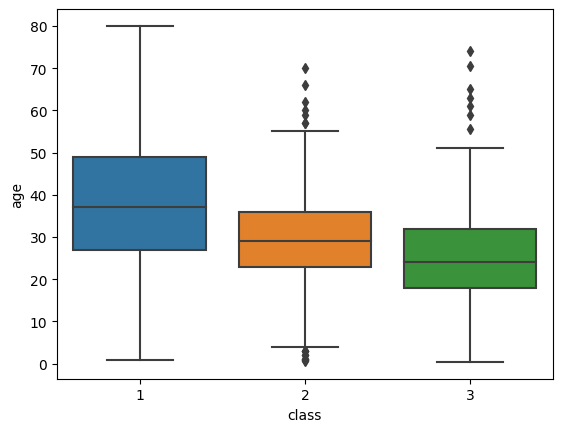

In [ ]:
sns.boxplot(x='class',y='age',data=titanic_data)

In [ ]:
titanic_data.head(5)

,last,first,gender,age,class,fare,embarked,survived
0,Braund,Mr. Owen Harris,M,22.0,3,7.2500,Southampton,no
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),F,38.0,1,71.2833,Cherbourg,yes
2,Heikkinen,Miss Laina,F,26.0,3,7.9250,Southampton,yes
3,Futrelle,Mrs. Jacques Heath (Lily May Peel),F,35.0,1,53.1000,Southampton,yes
4,Allen,Mr. William Henry,M,35.0,3,8.0500,Southampton,no


In [ ]:

#se tiver que apagar alguma coluna
#titanic_data.drop('nome_da_coluna', axis=1, inplace=True)

In [ ]:
titanic_data.dropna(inplace=True)

<Axes: >

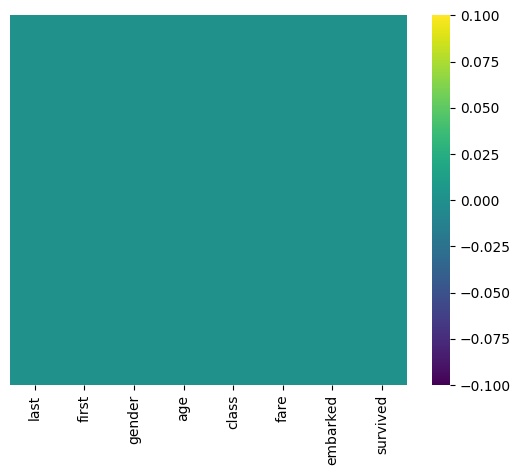

In [ ]:
sns.heatmap(titanic_data.isnull(),yticklabels=False, cmap='viridis')

In [ ]:
titanic_data.head(2)

,last,first,gender,age,class,fare,embarked,survived
0,Braund,Mr. Owen Harris,M,22.0,3,7.2500,Southampton,no
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),F,38.0,1,71.2833,Cherbourg,yes


In [ ]:
Survived = pd.get_dummies(titanic_data['survived'],drop_first=True)

In [ ]:
Survived.head(5)

,yes
0,0
1,1
2,1
3,1
4,0


In [ ]:
Gender = pd.get_dummies(titanic_data['gender'],drop_first=True)

In [ ]:
titanic_data.head(2)

,last,first,gender,age,class,fare,embarked,survived
0,Braund,Mr. Owen Harris,M,22.0,3,7.2500,Southampton,no
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),F,38.0,1,71.2833,Cherbourg,yes


In [ ]:
Gender.head(5)

,M
0,1
1,0
2,0
3,0
4,1


In [ ]:
Embarked = pd.get_dummies(titanic_data['embarked'],drop_first = True)

In [ ]:
Embarked.head(5)

,Queenstown,Southampton
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [ ]:
titanic_data.head(2)

,last,first,gender,age,class,fare,embarked,survived
0,Braund,Mr. Owen Harris,M,22.0,3,7.2500,Southampton,no
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),F,38.0,1,71.2833,Cherbourg,yes


In [ ]:
cl = pd.get_dummies(titanic_data['class'],drop_first = True)

In [ ]:
cl.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [ ]:
titanic_data = pd.concat([titanic_data,Survived, Gender, Embarked,cl], axis=1)

In [ ]:
titanic_data.head(5)

,last,first,gender,age,class,fare,embarked,survived,yes,M,Queenstown,Southampton,2,3
0,Braund,Mr. Owen Harris,M,22.0,3,7.2500,Southampton,no,0,1,0,1,0,1
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),F,38.0,1,71.2833,Cherbourg,yes,1,0,0,0,0,0
2,Heikkinen,Miss Laina,F,26.0,3,7.9250,Southampton,yes,1,0,0,1,0,1
3,Futrelle,Mrs. Jacques Heath (Lily May Peel),F,35.0,1,53.1000,Southampton,yes,1,0,0,1,0,0
4,Allen,Mr. William Henry,M,35.0,3,8.0500,Southampton,no,0,1,0,1,0,1


In [ ]:
titanic_data.drop(['last','first'],axis=1,inplace=True)

In [ ]:


titanic_data.head(2)

,gender,age,class,fare,embarked,survived,yes,M,Queenstown,Southampton,2,3
0,M,22.0,3,7.2500,Southampton,no,0,1,0,1,0,1
1,F,38.0,1,71.2833,Cherbourg,yes,1,0,0,0,0,0


In [ ]:
titanic_data = titanic_data.rename(columns={"class":"classe","yes": "Survived", "M": "Male",2:"class2", 3:"class3"})

In [ ]:
#titanic_data.drop(['class'],axis=1,inplace=True)

In [ ]:
titanic_data.head(2)

,gender,age,classe,fare,embarked,survived,Survived,Male,Queenstown,Southampton,class2,class3
0,M,22.0,3,7.2500,Southampton,no,0,1,0,1,0,1
1,F,38.0,1,71.2833,Cherbourg,yes,1,0,0,0,0,0


#TRAIN E TEST DATA

In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       714 non-null    object 
 1   age          714 non-null    float64
 2   classe       714 non-null    int64  
 3   fare         714 non-null    float64
 4   embarked     714 non-null    object 
 5   survived     714 non-null    object 
 6   Survived     714 non-null    uint8  
 7   Male         714 non-null    uint8  
 8   Queenstown   714 non-null    uint8  
 9   Southampton  714 non-null    uint8  
 10  class2       714 non-null    uint8  
 11  class3       714 non-null    uint8  
dtypes: float64(2), int64(1), object(3), uint8(6)
memory usage: 43.2+ KB


In [ ]:
X = titanic_data.drop(['Survived','classe','gender','survived','embarked'],axis=1)
y = titanic_data['Survived']

In [ ]:
X.head(2)

,age,fare,Male,Queenstown,Southampton,class2,class3
0,22.0,7.2500,1,0,1,0,1
1,38.0,71.2833,0,0,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()

In [ ]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.81      0.84      0.82       134\n           1       0.72      0.67      0.69        81\n\n    accuracy                           0.78       215\n   macro avg       0.76      0.75      0.76       215\nweighted avg       0.77      0.78      0.77       215\n'

Segundo o blog Ichi.pro, a métrica F1-score é uma das métricas mais importantes no Machine Learning. Entendendo que 'raios' é isso!

Na Estatística ouvimos o conceito de Acurácia, Precisão, Recall e F1-score. Depois já partimos para códigos e bibliotecas prontas, mas saber o conceito por tras é primordial pra facilitar sua tomada de decisão sobre as métricas de avaliação que podemos utilizar.

Já ouvimos falar também de Falso Positivo, Verdadeiro Positivo, Falso Negativo, Verdadeiro Negativo.

Pois é! É com estes valores da matriz de confusão que se calcula as métricas acima.

Vamos ver aqui:
Acurácia: É a divisão entre as somas dos Verdadeiros positivos e negativos E todos os valores da matriz de confusao (os Trues e os False).

Já a Precisão é a divisão entre o Verdadeiro Positivo e os Positivos Verdadeiro e Falso.

O Recall também é uma divisão do Verdadeiro Positivo porém agora, se divide com a soma do Verdadeiro Positivo e Falso Negativo.

Por fim, o F1-score! Segundo o blog Ichi.pro, a métrica F1-score é uma das métricas mais importantes no Machine Learning. Ele resume elegantemente o desempenho preditivo de um modelo, combinando duas métricas concorrentes- precisão e recall, que já aprendemos a calcular. Em comparação, o F1 é a média harmônica de precisão e recall. A pontuação F1 varia entre 0 e 1. Quanto mais próximo de 1, melhor é o modelo.


#Qual métrica escolher?

**Bom, se no seu estudo de caso, os erros Falso Positivos são mais indesejáveis, escolha uma versão do modelo com base na PRECISÃO, que tenha maior pontuação.**

**Se os erros causados pelos Falso Negativos são mais indesejáveis, então selecionamos a versão do modelo que baseado noRECALL, obteve a maior pontuação.**

Por fim, **se avaliarmos que ambos os tipos de erros são indesejáveis, seleciona-se a versão do modelo baseado na pontuação F1 que obteve a maior pontuação. **

Parece complicada a fórmula do F1 mas se trata de uma Média.
Média Harmônica e ainda há a média aritmética(nossa velha média) e a média geométrica(que é a raiz quadrada do Produto entre x e y).

Insights??? Temos!! Quanto mais desiguais forem os valores de precisão e recall, menor será o score do F1 ou da média harmônica.

Por quê? Porque a média harmônica consegue 'penalizar mais valores extremamente desiguais e valores extremamente baixos', mais do que a média aritmética ou a geométrica. Vale dizer também que se Precisão OU Recall for 0, F1 será 0.

Aqui já dá pra entender que na fase de Avaliação do seu Modelo de Machine Learning, a escolha entre Precisão, Recall ou F1 para avaliar modelos depende dos impactos relativos de Falso Positivos e Falso Negativos em seu caso de uso.


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, predictions)

array([[113,  21],
       [ 27,  54]])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
f'O modelo apresentou {round(accuracy_score(y_test, predictions)*100)}% de acurácia'

'O modelo apresentou 78% de acurácia'

#Assim chegamos no ponto onde nos propomos a CONSTRUIR O MODELO COM OS DADOS DE TREINAMENTO E PREDIZER A SAÍDA COM OS DADOS DE TESTE.

TAMBEM, calculamos a acurácia para checar o quão acurados, os resultados estão.

#Aqui um outro modelo proposto pelo ishara Neranjana, no site Kaggle. Os datasets estarão disponíveis porque o autor deixou público.

In [ ]:
from google.colab import files

In [ ]:
#uploaded = files.upload()

In [ ]:
#uploaded = files.upload()

In [ ]:
#uploaded = files.upload()

In [ ]:
train = X_train

In [ ]:
train.shape

(499, 7)

In [ ]:
test = X_test

In [ ]:
test.shape

(215, 7)

In [ ]:
test.columns

Index(['age', 'fare', 'Male', 'Queenstown', 'Southampton', 'class2', 'class3'], dtype='object')

In [ ]:
titanic_data.columns

Index(['gender', 'age', 'classe', 'fare', 'embarked', 'survived', 'Survived',
       'Male', 'Queenstown', 'Southampton', 'class2', 'class3'],
      dtype='object')

In [ ]:
data_final = titanic_data.drop(['gender','classe','embarked','survived','age','fare','Queenstown','Southampton','class2','class3'],1)

<ipython-input-66-611acc830b93>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data_final = titanic_data.drop(['gender','classe','embarked','survived','age','fare','Queenstown','Southampton','class2','class3'],1)


In [ ]:
data_final.head()

,Survived,Male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [ ]:
print('training set dimensions: ', train.shape)

training set dimensions:  (499, 7)


In [ ]:
print('test set dimensions: ', test.shape)

test set dimensions:  (215, 7)


In [ ]:
test.head(5)

,age,fare,Male,Queenstown,Southampton,class2,class3
689,15.0,211.3375,0,0,1,0,0
278,7.0,29.1250,1,1,0,0,1
506,33.0,26.0000,0,0,1,1,0
9,14.0,30.0708,0,0,0,1,0
494,21.0,8.0500,1,0,1,0,1


In [ ]:
train.head(5)

,age,fare,Male,Queenstown,Southampton,class2,class3
641,24.0,69.3000,0,0,0,0,0
433,17.0,7.1250,1,0,1,0,1
202,34.0,6.4958,1,0,1,0,1
585,18.0,79.6500,0,0,1,0,0
544,50.0,106.4250,1,0,0,0,0


In [ ]:
categorical_cols = train.select_dtypes(include=['object'])
print(f'The dataset contains {len(categorical_cols.columns.tolist())} categorical columns')

for cols in categorical_cols.columns:
  print(cols,':', len(categorical_cols[cols].unique()),'labels')

The dataset contains 0 categorical columns


In [ ]:
categorical_cols = titanic_data.select_dtypes(include=['object'])
print(f'The dataset contains {len(categorical_cols.columns.tolist())} categorical columns')

for cols in categorical_cols.columns:
  print(cols,':', len(categorical_cols[cols].unique()),'labels')

The dataset contains 3 categorical columns
gender : 2 labels
embarked : 3 labels
survived : 2 labels


In [ ]:
import plotly.graph_objects as go

night_colors = ['#D3DBDD',  'navy',  '#57A7F3']
labels = [x for x in titanic_data.embarked.value_counts().index]
values = titanic_data.embarked.value_counts()

# Use `hole` to create a donut-like pie chart
fig=go.Figure(data=[go.Pie(labels=["Southampton","Cherbourg","Queenstown"],
                           values=values,hole=.3,pull=[0,0,0.06,0])])

fig.update_layout(
    title_text="Porto de Embarque")
fig.update_traces(marker=dict(colors=night_colors))
fig.show()

In [ ]:
labels = [x for x in titanic_data.gender.value_counts().index]
values = titanic_data.gender.value_counts()

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values, hole=.3,pull=[0.03, 0])])

fig.update_layout(
    title_text="Homens ")
fig.update_traces(marker=dict(colors=night_colors))
fig.show()

Haviam 63.4% passageiros masculinos na embarcação o que é significantemente maior que os passageiros femininos.

In [ ]:
train.columns

Index(['age', 'fare', 'Male', 'Queenstown', 'Southampton', 'class2', 'class3'], dtype='object')

In [ ]:
import plotly.figure_factory as ff
from plotly.offline import iplot
age=train['age'].dropna()
fig = ff.create_distplot([age],['age'],bin_size=1,)
fig.update_traces(marker=dict(color='#57A7F3'))
fig.update_layout(
    title="Distribuição da Idade",
)
iplot(fig, filename='Basic Distplot')

A idade dos passageiros está positivamente distorcida e tamém houve alguns valores faltantes nesta variável.

In [ ]:
fig = ff.create_distplot([train['fare']],['fare'],bin_size=10)
fig.update_traces(marker=dict(color='#57A7F3'))
fig.update_layout(
    title="Distribuição da Tarifa",
)
iplot(fig, filename='Basic Distplot')

A distribuição das tarifas também está distorcida. Podemos usar a transformação logaritmica se quisermos normalizar essas distribuições positivamente distorcidas.

In [ ]:
titanic_data.head(2)

,gender,age,classe,fare,embarked,survived,Survived,Male,Queenstown,Southampton,class2,class3
0,M,22.0,3,7.2500,Southampton,no,0,1,0,1,0,1
1,F,38.0,1,71.2833,Cherbourg,yes,1,0,0,0,0,0


In [ ]:
labels = [x for x in titanic_data.classe.value_counts().index]
values = titanic_data.classe.value_counts()

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values, hole=.3,pull=[0,0,0.04])])

fig.update_layout(
    title_text="Classes")
fig.update_traces(marker=dict(colors=night_colors))
fig.show()

Embarcaram poucos passageiros neste porto de embarque.

In [ ]:
titanic_data.head(2)

,gender,age,classe,fare,embarked,survived,Survived,Male,Queenstown,Southampton,class2,class3
0,M,22.0,3,7.2500,Southampton,no,0,1,0,1,0,1
1,F,38.0,1,71.2833,Cherbourg,yes,1,0,0,0,0,0


In [ ]:
import plotly.offline as py
def PieChart(column, title, limit):
    male = titanic_data[titanic_data['gender'] == 'M']
    female = titanic_data[titanic_data['gender'] == 'F']
    count_male = male[column].value_counts()[:limit].reset_index()
    count_female = female[column].value_counts()[:limit].reset_index()
    color = ['#D3DBDD','navy','#57A7F3', 'lightgrey','orange', 'gold','lightgreen',
                            '#D0F9B1','tomato', 'tan']

    trace1 = go.Pie(labels=count_male['index'],
                    values=count_male[column],
                    name= "male",
                    hole= .4,
                    domain= {'x': [0, .48]},
                   marker=dict(colors=color))

    trace2 = go.Pie(labels=count_female['index'],
                    values=count_female[column],
                    name="female",
                    hole= .4,
                    domain= {'x': [.52, 1]})
    layout = dict(title= title, font=dict(size=13), legend=dict(orientation="h"),
                  annotations = [
                      dict(
                          x=.21, y=.5,
                          text='Male',
                          showarrow=False,
                          font=dict(size=16)
                      ),
                      dict(
                          x=.80, y=.5,
                          text='Female',
                          showarrow=False,
                          font=dict(size=16)
                      )
        ])

    fig = dict(data=[trace1, trace2], layout=layout)
    py.iplot(fig)

In [ ]:
PieChart('classe', "Classe and Gênero", 3)

Estes gráficos mostram que dos passageiros da classe 1 a maioria são do sexo feminino e a maioria dos passageiros da classe 3 são do sexo masculino. Isto pode ter um efeito no numero muito baixo de sobreviventes do sexo masculino.

In [ ]:
PieChart('embarked', "Ponto de Embarque e Gênero", 3)

O porto de embarque não sofre alteração significativa com o sexo do passageiro.

In [ ]:
train.head(2)

,age,fare,Male,Queenstown,Southampton,class2,class3
641,24.0,69.300,0,0,0,0,0
433,17.0,7.125,1,0,1,0,1


In [ ]:
#train['Survived'] = train['Survived'].astype('category')
#train['Pclass'] = train['Pclass'].astype('category')
#train['Pclass'] = train['SibSp'].astype('category')

In [ ]:
titanic_data.head(2)

,gender,age,classe,fare,embarked,survived,Survived,Male,Queenstown,Southampton,class2,class3
0,M,22.0,3,7.2500,Southampton,no,0,1,0,1,0,1
1,F,38.0,1,71.2833,Cherbourg,yes,1,0,0,0,0,0


In [ ]:
import plotly.express as px

df = titanic_data.groupby(by=["survived", "gender"]).size().reset_index(name="counts")
px.bar(data_frame=df, x="gender",
       y="counts",
       color="survived",
       barmode="group",
       color_discrete_sequence =['#8FCBD8','#D3DBDD'],
       title="Sobreviventes X Gênero")

De todos os sobreviventes, havia muitas mulheres. Isto pode ser devido ao fato de ser dada maior prioridade ao salvamento das crianças e mulheres no navio, e também haveria alta prioridade para os passageiros da classe 1. Portanto, a classe do bilhete que você está comprando terá um efeito significativo na sobrevivência de incidentes trágicos.     

In [ ]:
train.columns

Index(['age', 'fare', 'Male', 'Queenstown', 'Southampton', 'class2', 'class3'], dtype='object')

In [ ]:
data_final.head(5)

,Survived,Male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [ ]:
df = titanic_data.groupby(by=["survived", "classe"]).size().reset_index(name="counts")
px.bar(data_frame=df, x="classe", y="counts", color="survived", barmode="group",color_discrete_sequence =['#8FCBD8','#D3DBDD']
      ,title="Sobreviventes X Classe")

In [ ]:
df = titanic_data.groupby(by=["survived", "embarked"]).size().reset_index(name="counts")
px.bar(data_frame=df, x="embarked", y="counts", color="survived", barmode="group",
       color_discrete_sequence =['#D3DBDD','#8FCBD8'],title="Sobreviventes X Pontos de Embarque")

Embora exista uma elevada percentagem de sobreviventes cujo porto de embarque seja Churbog, o numero de passageiros em Churbog é baixo em comparação em Southampton e também isto pode acontecer devido ao facto de muito em Churbog serem passageiros da classe 1.

In [ ]:
df = titanic_data.groupby(by=["classe", "embarked"]).size().reset_index(name="counts")
px.bar(data_frame=df, x="embarked", y="counts", color="classe", barmode="group",color_discrete_sequence =['navy','#57A7F3','#D3DBDD'],
      title="Classe X Pontos de Embarque")

In [ ]:
px.scatter(data_frame = titanic_data
           ,x = 'fare'
           ,y = 'age'
           ,color = 'Survived',
           size='fare',
           hover_data=['gender', 'age'],
           color_discrete_sequence =['navy','#57A7F3','#D3DBDD'],
           title="Idade X Tarifa"
           )

A maioria dos passageiros pagaram menos de 100 pela passagem.

In [ ]:
df = titanic_data.groupby(by=["survived", "embarked"]).size().reset_index(name="counts")
px.bar(data_frame=df, x="embarked", y="counts",
       color="survived", barmode="group",
       color_discrete_sequence =['#D3DBDD','#8FCBD8'],
      title="Sobreviventes X Pontos de Embarque")

In [ ]:
titanic_data.head(2)

,gender,age,classe,fare,embarked,survived,Survived,Male,Queenstown,Southampton,class2,class3
0,M,22.0,3,7.2500,Southampton,no,0,1,0,1,0,1
1,F,38.0,1,71.2833,Cherbourg,yes,1,0,0,0,0,0


Sera que embarcar em Southampton pode predizer se sobreviveria ou não?


In [ ]:
df = titanic_data.groupby(by=["gender", "embarked"]).size().reset_index(name="counts")
px.bar(data_frame=df, x="embarked", y="counts",
       color="gender", barmode="group",
       color_discrete_sequence =['#D3DBDD','#8FCBD8'],
      title="Gênero X Pontos de Embarque")

A maioria dos homens em Southampton assim como também as mulheres.

Esses dois gráficos mostram que a maior percentagem de passageiros sem parentesco no navio não sobreviveu, enquanto a probabilidade de sobrevivência foi maior da outra forma(com parentesco).

#DATA PRE PROCESSING

PRIMEIRO, ESTOU ELIMINANDO O NOME, A IDENTIFICAÇÃO DO PASSAGEIRO E AS VARIAVEIS DO BILHETE, UMA VEZ QUE ELES CONTEM VALORES UNICOS E FAZER DUMMIES PARA ELES AUMENTA A DIMENSIONALIDADE DO DATASET.

In [ ]:
train.head()

,age,fare,Male,Queenstown,Southampton,class2,class3
641,24.0,69.3000,0,0,0,0,0
433,17.0,7.1250,1,0,1,0,1
202,34.0,6.4958,1,0,1,0,1
585,18.0,79.6500,0,0,1,0,0
544,50.0,106.4250,1,0,0,0,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 641 to 51
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          499 non-null    float64
 1   fare         499 non-null    float64
 2   Male         499 non-null    uint8  
 3   Queenstown   499 non-null    uint8  
 4   Southampton  499 non-null    uint8  
 5   class2       499 non-null    uint8  
 6   class3       499 non-null    uint8  
dtypes: float64(2), uint8(5)
memory usage: 14.1 KB


Vamos checar as porcentagens de valores ausentes no dataset agora.

In [ ]:
features = [features for features in train.columns if train[features].isnull().sum()> 1]

for feature in features:
  print(feature, np.round(train[feature].isnull().mean(),4),'% valores ausentes.\n')

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 689 to 700
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          215 non-null    float64
 1   fare         215 non-null    float64
 2   Male         215 non-null    uint8  
 3   Queenstown   215 non-null    uint8  
 4   Southampton  215 non-null    uint8  
 5   class2       215 non-null    uint8  
 6   class3       215 non-null    uint8  
dtypes: float64(2), uint8(5)
memory usage: 6.1 KB


In [ ]:
categorical_cols_train= train.select_dtypes(include=['object'])

print(f'The dataset contains {len(categorical_cols_train.columns.tolist())} categorical columns')

The dataset contains 0 categorical columns


In [ ]:
categorical_cols_missing = categorical_cols_train.columns[
    categorical_cols_train.isnull().any()]

In [ ]:
train['age'].describe()

count    499.000000
mean      29.862064
std       14.581332
min        0.420000
25%       21.000000
50%       28.000000
75%       39.000000
max       80.000000
Name: age, dtype: float64

In [ ]:
train['fare'].describe()


count    499.000000
mean      35.374173
std       55.063576
min        0.000000
25%        8.050000
50%       15.550000
75%       35.500000
max      512.329200
Name: fare, dtype: float64

Os valores faltantes da variável idade são imputados colocando valores aleatorios entre o percentil 25 e 75. No conjunto de teste faltam valores para a variavel de tarifa, que também sao imputados a parti do dataset de treinamento.

#vamos fazer o tratamento de valores ausentes

In [ ]:
#vamos fazer o tratamento de valores ausentes
np.random.seed(1)
train['age'].fillna(np.random.randint(20,38), inplace = True)
test['age'].fillna(np.random.randint(20,38), inplace = True)
train['fare'].fillna(np.random.randint(8,34), inplace = True)
test['fare'].fillna(np.random.randint(8,34), inplace = True)

<Axes: >

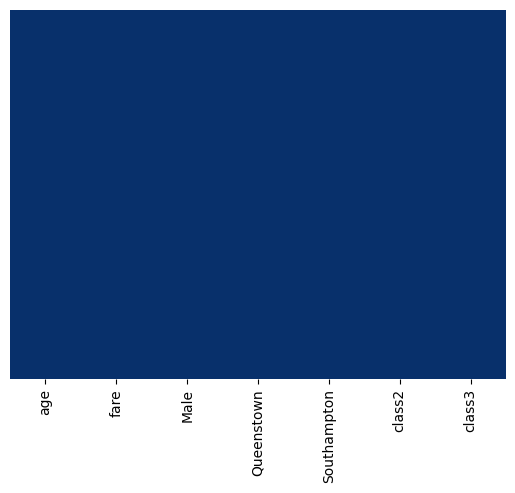

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="Blues_r")

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 641 to 51
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          499 non-null    float64
 1   fare         499 non-null    float64
 2   Male         499 non-null    uint8  
 3   Queenstown   499 non-null    uint8  
 4   Southampton  499 non-null    uint8  
 5   class2       499 non-null    uint8  
 6   class3       499 non-null    uint8  
dtypes: float64(2), uint8(5)
memory usage: 14.1 KB


In [ ]:
train.head(5)

,age,fare,Male,Queenstown,Southampton,class2,class3
641,24.0,69.3000,0,0,0,0,0
433,17.0,7.1250,1,0,1,0,1
202,34.0,6.4958,1,0,1,0,1
585,18.0,79.6500,0,0,1,0,0
544,50.0,106.4250,1,0,0,0,0


In [ ]:
train.isnull().any()

age            False
fare           False
Male           False
Queenstown     False
Southampton    False
class2         False
class3         False
dtype: bool

#Criando variaveis dummies para variável embarked


In [ ]:
train.shape

(499, 7)

In [ ]:
titanic_data.head(2)

,gender,age,classe,fare,embarked,survived,Survived,Male,Queenstown,Southampton,class2,class3
0,M,22.0,3,7.2500,Southampton,no,0,1,0,1,0,1
1,F,38.0,1,71.2833,Cherbourg,yes,1,0,0,0,0,0


In [ ]:
data = titanic_data[[i for i in titanic_data.columns if i not in('age',
                                                                 'embarked',
                                                                 'survived',
                                                                 'fare',
                                                                 'gender',                                                'Queenstown',
                                                                 'classe')
]]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Survived     714 non-null    uint8
 1   Male         714 non-null    uint8
 2   Southampton  714 non-null    uint8
 3   class2       714 non-null    uint8
 4   class3       714 non-null    uint8
dtypes: uint8(5)
memory usage: 9.1 KB


#CORRELAÇÕES

Aqui verificarei as correlações de três partes separadamente, isto é, correlações entre variaveis numéricas e numéricas, variaveis numéricas e categóricas e variaveis categoricas e categóricas.

In [ ]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_V(var1,var2):
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None))
  # construção da mesa cruzada (crosstab)
  stat = chi2_contingency(crosstab)[0]
  #manutenção da estatística de teste do teste chi2
  obs = np.sum(crosstab) # numero de observações
  mini = min(crosstab.shape)-1
  # pega o valor minimo entre as colunas e as linhas da tabela cruzada
  return (stat/(obs*mini))

In [ ]:
rows= []

for var1 in data:
  col = []
  for var2 in data:
    cramers =cramers_V(data[var1], data[var2]) # teste de Cramers_v
    col.append(round(cramers,2))
    #Manutenção do valor arredondado do V de Cramer
  rows.append(col)

cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data.columns, index =data.columns)
df

,Survived,Male,Southampton,class2,class3
Survived,0.99,0.29,0.02,0.01,0.11
Male,0.29,0.99,0.01,0.00,0.03
Southampton,0.02,0.01,0.99,0.03,0.01
class2,0.01,0.00,0.03,0.99,0.31
class3,0.11,0.03,0.01,0.31,0.99


<ipython-input-117-724c93aa2c3a>:5: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



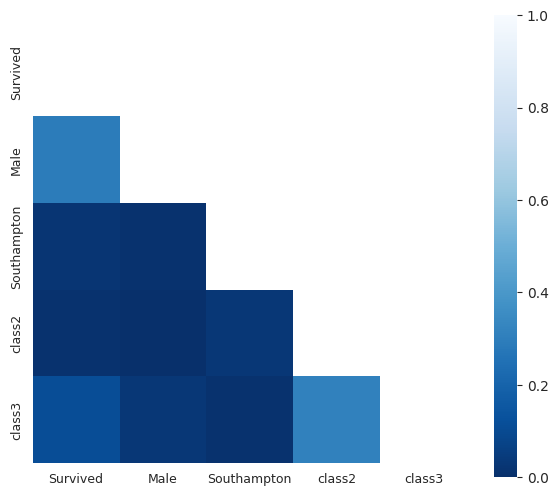

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(7,6))

mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


with sns.axes_style("white"):
  ax = sns.heatmap(df, mask=mask,vmin=0., vmax=1, square=True, cmap="Blues_r")
  ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 9)
  ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 9)

plt.show()

In [ ]:
!pip install dython

# Correlação Categorica X Numérica

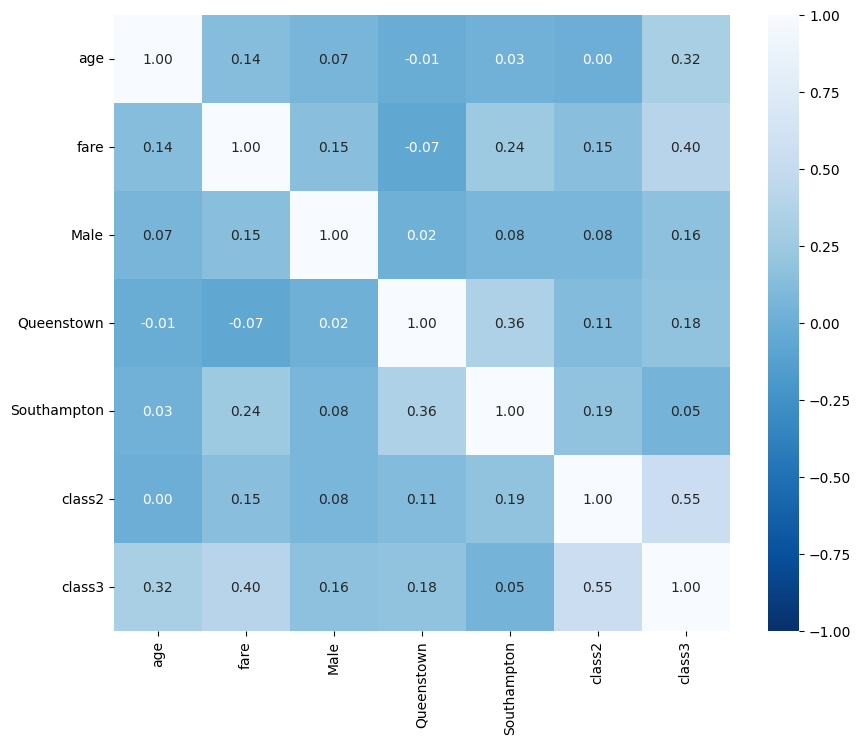

{'corr':                   age      fare      Male  Queenstown  Southampton    class2  \
 age          1.000000  0.137619  0.065048   -0.013931     0.030336  0.002619   
 fare         0.137619  1.000000  0.146761   -0.065416     0.244620  0.146671   
 Male         0.065048  0.146761  1.000000    0.021834     0.075662  0.075978   
 Queenstown  -0.013931 -0.065416  0.021834    1.000000     0.357501  0.113793   
 Southampton  0.030336  0.244620  0.075662    0.357501     1.000000  0.187350   
 class2       0.002619  0.146671  0.075978    0.113793     0.187350  1.000000   
 class3       0.317991  0.400798  0.164267    0.182443     0.051098  0.553571   
 
                class3  
 age          0.317991  
 fare         0.400798  
 Male         0.164267  
 Queenstown   0.182443  
 Southampton  0.051098  
 class2       0.553571  
 class3       1.000000  ,
 'ax': <Axes: >}

In [ ]:
cat_cols=[]
for c in data.columns:
    cat_cols.append(c)

from dython import nominal
nominal.associations(
    train,
    nominal_columns=cat_cols,
    figsize=(10,8),
    cmap="Blues_r")

#Correlaçao Numérico X Numérico

In [ ]:
train[[i for i in train.columns if i in (
    'Age','SibSp','Parch','Pclass','Fare',)]]

""
641
433
202
585
544
...
179
808
93
291


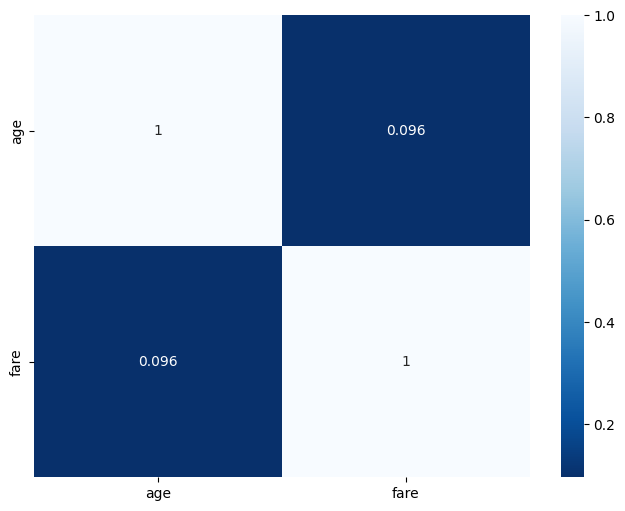

In [ ]:
data1 = titanic_data[[i for i in train.columns if i in (
    'age','Survived','fare',)]]
plt.figure(figsize=(8,6))
sns.heatmap(data1.corr(),annot=True,cmap="Blues_r")
plt.show()

In [ ]:
train.head(5)

,age,fare,Male,Queenstown,Southampton,class2,class3
641,24.0,69.3000,0,0,0,0,0
433,17.0,7.1250,1,0,1,0,1
202,34.0,6.4958,1,0,1,0,1
585,18.0,79.6500,0,0,1,0,0
544,50.0,106.4250,1,0,0,0,0


In [ ]:
test.head(2)

,age,fare,Male,Queenstown,Southampton,class2,class3
689,15.0,211.3375,0,0,1,0,0
278,7.0,29.1250,1,1,0,0,1


In [ ]:
titanic_data.head(2)

,gender,age,classe,fare,embarked,survived,Survived,Male,Queenstown,Southampton,class2,class3
0,M,22.0,3,7.2500,Southampton,no,0,1,0,1,0,1
1,F,38.0,1,71.2833,Cherbourg,yes,1,0,0,0,0,0


In [ ]:
X = titanic_data.drop(['Survived','classe','gender','survived','embarked'],axis=1)
y = titanic_data['Survived']

In [ ]:
#dividindo o conjunto entre subconjuntos train e teste
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.2,random_state=1234)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

#lbibliotecas para avaliação do modelo
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
x_train

,age,fare,Male,Queenstown,Southampton,class2,class3
636,32.00,7.925,1,0,1,0,1
630,80.00,30.000,1,0,1,0,0
795,39.00,13.000,1,0,1,1,0
345,24.00,13.000,0,0,1,1,0
141,22.00,7.750,0,0,1,0,1
...,...,...,...,...,...,...,...
831,0.83,18.750,1,0,1,1,0
465,38.00,7.050,1,0,1,0,1
253,30.00,16.100,1,0,1,0,1
70,32.00,10.500,1,0,1,1,0


#Ridge Classifier

In [ ]:
from sklearn.linear_model import RidgeClassifier
rc =RidgeClassifier()
model0=rc.fit(x_train, y_train)
print("train accuracy:",model0.score(x_train, y_train),"\n","test accuracy:",
      model0.score(x_test,y_test))
rcpred = rc.predict(x_test)
print("\n")
print("classification report for logistic regression")
print(classification_report(rcpred,y_test))
print("\n")
print("confusion matrix for logistic regression")
disprc =confusion_matrix(rcpred, y_test)
disprc

train accuracy: 0.7950963222416813 
 test accuracy: 0.7762237762237763


classification report for logistic regression
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        83
           1       0.74      0.72      0.73        60

    accuracy                           0.78       143
   macro avg       0.77      0.77      0.77       143
weighted avg       0.78      0.78      0.78       143



confusion matrix for logistic regression


array([[68, 15],
       [17, 43]])

#REGRESSÃO LOGISTICA

In [ ]:
lr = LogisticRegression(max_iter=2000,penalty='l2')
model1=lr.fit(x_train, y_train)
print("train accuracy:",model1.score(
    x_train, y_train),"\n","test accuracy:",
      model1.score(x_test,y_test))
lrpred = lr.predict(x_test)
print("\n")
print("classification report for logistic regression")
print(classification_report(lrpred,y_test))
print("\n")
print("confusion matrix for logistic regression")
displr = confusion_matrix(lrpred, y_test)
displr

train accuracy: 0.8003502626970228 
 test accuracy: 0.7762237762237763


classification report for logistic regression
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        83
           1       0.74      0.72      0.73        60

    accuracy                           0.78       143
   macro avg       0.77      0.77      0.77       143
weighted avg       0.78      0.78      0.78       143



confusion matrix for logistic regression


array([[68, 15],
       [17, 43]])

#ANALISE DISCRIMINANTE LINEAR

In [ ]:
#linear discriminant analysis
lda = LinearDiscriminantAnalysis()
model2=lda.fit(x_train, y_train)
print("train accuracy:",model2.score(x_train, y_train),"\n","test accuracy:",model2.score(x_test,y_test))

ldapred = lda.predict(x_test)
print("\n")
print("classification report for linear discriminant analysis")
print(classification_report(ldapred,y_test))
print("\n")
print("confusion matrix for linear discriminant analysis")
displda = confusion_matrix(ldapred,y_test)
displda

train accuracy: 0.7950963222416813 
 test accuracy: 0.7762237762237763


classification report for linear discriminant analysis
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        83
           1       0.74      0.72      0.73        60

    accuracy                           0.78       143
   macro avg       0.77      0.77      0.77       143
weighted avg       0.78      0.78      0.78       143



confusion matrix for linear discriminant analysis


array([[68, 15],
       [17, 43]])

#CLASSIFICAÇÃO DE ÁRVORE DE DECISÃO

In [ ]:
#decision tree classifier
dt=DecisionTreeClassifier()
model3=dt.fit(x_train, y_train)
print("train accuracy:",
      model3.score(x_train, y_train),
      "\n","test accuracy:",model3.score(x_test,y_test))

dtpred = dt.predict(x_test)
print("\n")
print("classification report for decision tree classifier")
print(classification_report(dtpred,y_test))
print("\n")
print("confusion matrix for decision tree classifier")
dispdt = confusion_matrix(dtpred,y_test)
dispdt

train accuracy: 0.9877408056042032 
 test accuracy: 0.7622377622377622


classification report for decision tree classifier
              precision    recall  f1-score   support

           0       0.78      0.81      0.80        81
           1       0.74      0.69      0.72        62

    accuracy                           0.76       143
   macro avg       0.76      0.75      0.76       143
weighted avg       0.76      0.76      0.76       143



confusion matrix for decision tree classifier


array([[66, 15],
       [19, 43]])

#CLASSIFICAÇÃO POR RANDOM FOREST

In [ ]:
rf=RandomForestClassifier(random_state=1234)
model4=rf.fit(x_train, y_train)
print("train accuracy:",
      model4.score(x_train, y_train),
      "\n","test accuracy:",model4.score(x_test,y_test))

rfpred = rf.predict(x_test)
print("\n")
print("classification report for random forest classifier")
print(classification_report(rfpred,y_test))
print("\n")
print("confusion matrix for random forest classifier")
disprf = confusion_matrix(rfpred, y_test)
disprf

train accuracy: 0.9877408056042032 
 test accuracy: 0.7902097902097902


classification report for random forest classifier
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        85
           1       0.74      0.74      0.74        58

    accuracy                           0.79       143
   macro avg       0.78      0.78      0.78       143
weighted avg       0.79      0.79      0.79       143



confusion matrix for random forest classifier


array([[70, 15],
       [15, 43]])

#CLASSIFICAÇÃO POR GRADIENT BOOST

In [ ]:
gbm=GradientBoostingClassifier()
model5=gbm.fit(x_train, y_train)
print("train accuracy:",model5.score(x_train, y_train),
      "\n","test accuracy:",model5.score(x_test,y_test))

gbmpred = gbm.predict(x_test)
print("\n")
print("classification report for gradient boosting classifier")
print(classification_report(gbmpred,y_test))
print("\n")
print("confusion matrix for gradient boosting classifier")
dispgbm = confusion_matrix(gbmpred,y_test)
dispgbm

train accuracy: 0.9054290718038529 
 test accuracy: 0.8391608391608392


classification report for gradient boosting classifier
              precision    recall  f1-score   support

           0       0.89      0.84      0.87        90
           1       0.76      0.83      0.79        53

    accuracy                           0.84       143
   macro avg       0.83      0.84      0.83       143
weighted avg       0.84      0.84      0.84       143



confusion matrix for gradient boosting classifier


array([[76, 14],
       [ 9, 44]])

# CLASSIFICAÇÃO POR ADABOOST

In [ ]:
ada=AdaBoostClassifier()
model6=ada.fit(x_train, y_train)
print("train accuracy:",model6.score(x_train, y_train),"\n","test accuracy:",model6.score(x_test,y_test))

adapred = ada.predict(x_test)
print("\n")
print("classification report for adaboost classifier")
print(classification_report(adapred,y_test))
print("\n")
print("confusion matrix for adaboost classifier")
dispada = confusion_matrix(adapred,y_test)
dispada

train accuracy: 0.830122591943958 
 test accuracy: 0.8181818181818182


classification report for adaboost classifier
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        83
           1       0.79      0.77      0.78        60

    accuracy                           0.82       143
   macro avg       0.81      0.81      0.81       143
weighted avg       0.82      0.82      0.82       143



confusion matrix for adaboost classifier


array([[71, 12],
       [14, 46]])

#CLASSIFICAÇÃO POR EXTREME GRADIENTE BOOST

In [ ]:
xgb = XGBClassifier(random_state=1234)
model7=xgb.fit(x_train.values, y_train)
print("train accuracy:",model7.score(x_train, y_train),
      "\n","test accuracy:",model7.score(x_test,y_test))

xgbpred = xgb.predict(x_test.values)
print("\n")
print("classification report for extreme gradient boosting classifier")
print(classification_report(xgbpred,y_test))
print("\n")
print("confusion matrix for extreme gradient boosting classifier")
dispxgb = confusion_matrix(xgbpred,y_test)
dispxgb

train accuracy: 0.9719789842381786 
 test accuracy: 0.7902097902097902


classification report for extreme gradient boosting classifier
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        87
           1       0.72      0.75      0.74        56

    accuracy                           0.79       143
   macro avg       0.78      0.78      0.78       143
weighted avg       0.79      0.79      0.79       143



confusion matrix for extreme gradient boosting classifier


array([[71, 16],
       [14, 42]])

#CLASSIFICAÇÃO POR EXTRA TREE

In [ ]:
extree = ExtraTreesClassifier()
model8=extree.fit(x_train, y_train)
print("train accuracy:",model8.score(x_train, y_train),"\n","test accuracy:",model8.score(x_test,y_test))

extpred = extree.predict(x_test)
print("\n")
print("classification report for extra tree classifier")
print(classification_report(extpred,y_test))
print("\n")
print("confusion matrix for extra tree classifier")
dispext = confusion_matrix(extpred,y_test)
dispext

train accuracy: 0.9877408056042032 
 test accuracy: 0.7902097902097902


classification report for extra tree classifier
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        83
           1       0.76      0.73      0.75        60

    accuracy                           0.79       143
   macro avg       0.79      0.78      0.78       143
weighted avg       0.79      0.79      0.79       143



confusion matrix for extra tree classifier


array([[69, 14],
       [16, 44]])

#CLASSIFICAÇÃO POR VOTING

In [ ]:
from sklearn.ensemble import VotingClassifier
clf1 = RandomForestClassifier(random_state=1234)
clf2 = LogisticRegression(max_iter=2000,penalty='l2')

vc = VotingClassifier(estimators=[('xgb', clf1),('lr', clf2)], voting='soft')
model9=vc.fit(x_train, y_train)
print("train accuracy:",model9.score(x_train, y_train),
      "\n","test accuracy:",model9.score(x_test,y_test))

vcpred = vc.predict(x_test)
print("\n")
print("classification report for voting classifier")
print(classification_report(vcpred,y_test))
print("\n")
print("confusion matrix for voting classifier")
dispvc = confusion_matrix(vcpred,y_test)
dispvc

train accuracy: 0.9246935201401051 
 test accuracy: 0.7832167832167832


classification report for voting classifier
              precision    recall  f1-score   support

           0       0.82      0.81      0.82        86
           1       0.72      0.74      0.73        57

    accuracy                           0.78       143
   macro avg       0.77      0.78      0.77       143
weighted avg       0.78      0.78      0.78       143



confusion matrix for voting classifier


array([[70, 16],
       [15, 42]])

#CLASSIFICADOR STACKING

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
estimators = [('rf', RandomForestClassifier(random_state=1234)),
 ('ext', make_pipeline(LogisticRegression(max_iter=2000,penalty='l2')))]
sc= StackingClassifier( estimators=estimators)

model10=sc.fit(x_train, y_train)
print("train accuracy:",model10.score(x_train, y_train),
      "\n","test accuracy:",model10.score(x_test,y_test))

scpred = sc.predict(x_test)
print("\n")
print("classification report for voting classifier")
print(classification_report(scpred,y_test))
print("\n")
print("confusion matrix for voting classifier")
dispsc = confusion_matrix(scpred,y_test)
dispsc

train accuracy: 0.9124343257443083 
 test accuracy: 0.7902097902097902


classification report for voting classifier
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        85
           1       0.74      0.74      0.74        58

    accuracy                           0.79       143
   macro avg       0.78      0.78      0.78       143
weighted avg       0.79      0.79      0.79       143



confusion matrix for voting classifier


array([[70, 15],
       [15, 43]])

#CLASSIFICADOR CATBOOSTING

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.5 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
cc = CatBoostClassifier(silent=True )
model11=cc.fit(x_train, y_train)
print("train accuracy:",model11.score(x_train, y_train),
      "\n","test accuracy:",model11.score(x_test,y_test))

ccpred = cc.predict(x_test)
print("\n")
print("classification report for extra tree classifier")
print(classification_report(ccpred,y_test))
print("\n")
print("confusion matrix for extra tree classifier")
dispcc = confusion_matrix(ccpred,y_test)
dispcc

train accuracy: 0.9054290718038529 
 test accuracy: 0.8181818181818182


classification report for extra tree classifier
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        91
           1       0.72      0.81      0.76        52

    accuracy                           0.82       143
   macro avg       0.80      0.82      0.81       143
weighted avg       0.82      0.82      0.82       143



confusion matrix for extra tree classifier


array([[75, 16],
       [10, 42]])

#A VARIÁVEL RESPOSTA ESTÁ DESEQUILIBRADA, PORTANTO USAREI SMOTE PARA REAMOSTRAR O CONJUNTO DE DADOS.


In [ ]:
X.head(2)

,age,fare,Male,Queenstown,Southampton,class2,class3
0,22.0,7.2500,1,0,1,0,1
1,38.0,71.2833,0,0,0,0,0


In [ ]:
x_train.head()

,age,fare,Male,Queenstown,Southampton,class2,class3
636,32.0,7.925,1,0,1,0,1
630,80.0,30.000,1,0,1,0,0
795,39.0,13.000,1,0,1,1,0
345,24.0,13.000,0,0,1,1,0
141,22.0,7.750,0,0,1,0,1


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
oversample = SMOTE()
x_train1, y_train1 = oversample.fit_resample(x_train, y_train)

#VARIAVEL RESPOSTA DEPOIS DO OVERSAMPLING

In [ ]:
y.head(2)

0    0
1    1
Name: Survived, dtype: uint8

<Axes: ylabel='count'>

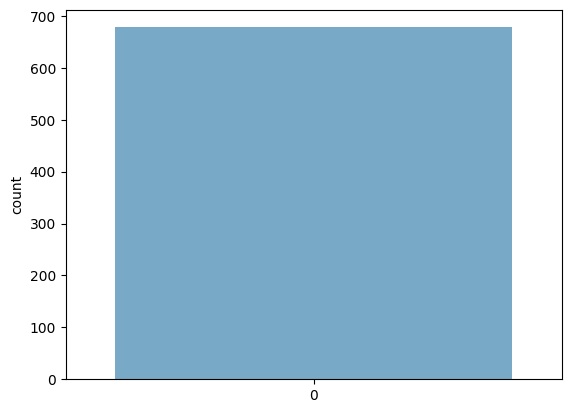

In [ ]:
sns.countplot(y_train1, palette='Blues')

In [ ]:
y_train1.head(20)

0     0
1     1
2     0
3     1
4     1
5     1
6     1
7     0
8     0
9     0
10    0
11    0
12    1
13    1
14    1
15    0
16    0
17    0
18    0
19    0
Name: Survived, dtype: uint8

REGRESSÃO LOGÍSTICA COM REAMOSTRAGEM

In [ ]:
lrw = LogisticRegression(max_iter=20000,penalty='l2')
model12=lrw.fit(x_train1, y_train1)
print("train accuracy:",model12.score(x_train1, y_train1),"\n","test accuracy:",model12.score(x_test,y_test))
lrwpred = lrw.predict(x_test)
print("\n")
print("classification report for logistic regression")
print(classification_report(lrwpred,y_test))
print("\n")
print("confusion matrix for logistic regression")
displrw = confusion_matrix(lrwpred,y_test)
displrw

train accuracy: 0.8067846607669616 
 test accuracy: 0.7692307692307693


classification report for logistic regression
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        80
           1       0.76      0.70      0.73        63

    accuracy                           0.77       143
   macro avg       0.77      0.76      0.76       143
weighted avg       0.77      0.77      0.77       143



confusion matrix for logistic regression


array([[66, 14],
       [19, 44]])

#ANÁLISE DISCRIMINANTE LINEAR COM REAMOSTRAGEM

In [ ]:
ldaw = LinearDiscriminantAnalysis()
model13=ldaw.fit(x_train1, y_train1)
print("train accuracy:",model13.score(x_train1, y_train1),"\n","test accuracy:",model13.score(x_test,y_test))

ldawpred = ldaw.predict(x_test)
print("\n")
print("classification report for linear discriminant analysis")
print(classification_report(ldawpred,y_test))
print("\n")
print("confusion matrix for linear discriminant analysis")
displdaw = confusion_matrix(ldawpred,y_test)
displdaw

train accuracy: 0.803834808259587 
 test accuracy: 0.7622377622377622


classification report for linear discriminant analysis
              precision    recall  f1-score   support

           0       0.78      0.81      0.80        81
           1       0.74      0.69      0.72        62

    accuracy                           0.76       143
   macro avg       0.76      0.75      0.76       143
weighted avg       0.76      0.76      0.76       143



confusion matrix for linear discriminant analysis


array([[66, 15],
       [19, 43]])

ARVORE DE DECISÃO COM REAMOSTRAGEM

decision tree classifier with resampling

In [ ]:
dtw=DecisionTreeClassifier()
model14=dtw.fit(x_train1, y_train1)
print("train accuracy:",model14.score(x_train1, y_train1),"\n","test accuracy:",model14.score(x_test,y_test))

dtwpred = dtw.predict(x_test)
print("\n")
print("classification report for decision tree classifier")
print(classification_report(dtwpred,y_test))
print("\n")
print("confusion matrix for decision tree classifier")
dispdtw =confusion_matrix(dtwpred,y_test)
dispdtw

train accuracy: 0.9896755162241888 
 test accuracy: 0.7692307692307693


classification report for decision tree classifier
              precision    recall  f1-score   support

           0       0.79      0.82      0.80        82
           1       0.74      0.70      0.72        61

    accuracy                           0.77       143
   macro avg       0.76      0.76      0.76       143
weighted avg       0.77      0.77      0.77       143



confusion matrix for decision tree classifier


array([[67, 15],
       [18, 43]])

#RANDOMFOREST COM REAMOSTRAGEM

In [ ]:
rfw=RandomForestClassifier()
model15=rfw.fit(x_train1, y_train1)
print("train accuracy:",model15.score(x_train1, y_train1),"\n","test accuracy:",model15.score(x_test,y_test))

rfwpred = rfw.predict(x_test)
print("\n")
print("classification report for random forest classifier")
print(classification_report(rfwpred,y_test))
print("\n")
print("confusion matrix for random forest classifier")
disprfw = confusion_matrix(rfwpred,y_test)
disprfw

train accuracy: 0.9896755162241888 
 test accuracy: 0.8111888111888111


classification report for random forest classifier
              precision    recall  f1-score   support

           0       0.85      0.84      0.84        86
           1       0.76      0.77      0.77        57

    accuracy                           0.81       143
   macro avg       0.80      0.80      0.80       143
weighted avg       0.81      0.81      0.81       143



confusion matrix for random forest classifier


array([[72, 14],
       [13, 44]])

#CLASSIFICADOR BAGGING COM REAMOSTRAGEM

In [ ]:
bgw=BaggingClassifier()
model16=bgw.fit(x_train1, y_train1)
print("train accuracy:",model16.score(x_train1, y_train1),"\n","test accuracy:",model16.score(x_test,y_test))

bgwpred = bgw.predict(x_test)
print("\n")
print("classification report for bagging classifier")
print(classification_report(bgwpred,y_test))
print("\n")
print("confusion matrix for bagging classifier")
dispbgw = confusion_matrix(bgwpred,y_test)
dispbgw

train accuracy: 0.9705014749262537 
 test accuracy: 0.8111888111888111


classification report for bagging classifier
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        88
           1       0.74      0.78      0.76        55

    accuracy                           0.81       143
   macro avg       0.80      0.81      0.80       143
weighted avg       0.81      0.81      0.81       143



confusion matrix for bagging classifier


array([[73, 15],
       [12, 43]])

#CLASSIFICADOR GRADIENT BOOSTING COM REAMOSTRAGEM

In [ ]:
gbmw=GradientBoostingClassifier()
model17=gbmw.fit(x_train1, y_train1)
print("train accuracy:",model17.score(x_train1, y_train1),"\n","test accuracy:",model17.score(x_test,y_test))

gbmwpred = gbmw.predict(x_test)
print("\n")
print("classification report for gradient boosting classifier")
print(classification_report(gbmwpred,y_test))
print("\n")
print("confusion matrix for gradient boosting classifier")
dispgbm = confusion_matrix(gbmwpred,y_test)
dispgbm

train accuracy: 0.9011799410029498 
 test accuracy: 0.8181818181818182


classification report for gradient boosting classifier
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        85
           1       0.78      0.78      0.78        58

    accuracy                           0.82       143
   macro avg       0.81      0.81      0.81       143
weighted avg       0.82      0.82      0.82       143



confusion matrix for gradient boosting classifier


array([[72, 13],
       [13, 45]])

#ADA BOOSTING COM REAMOSTRAGEM

In [ ]:
adaw=AdaBoostClassifier()
model18=adaw.fit(x_train1, y_train1)
print("train accuracy:",model18.score(x_train1, y_train1),"\n","test accuracy:",model18.score(x_test,y_test))

adawpred = adaw.predict(x_test)
print("\n")
print("classification report for adaboost classifier")
print(classification_report(adawpred,y_test))
print("\n")
print("confusion matrix for adaboost classifier")
dispadaw =confusion_matrix(adawpred,y_test)
dispadaw

train accuracy: 0.831858407079646 
 test accuracy: 0.8181818181818182


classification report for adaboost classifier
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        81
           1       0.81      0.76      0.78        62

    accuracy                           0.82       143
   macro avg       0.82      0.81      0.81       143
weighted avg       0.82      0.82      0.82       143



confusion matrix for adaboost classifier


array([[70, 11],
       [15, 47]])

#CLASSIFICADOR EXTREME GRADIENT BOOSTING COM REAMOSTRAGEM

In [ ]:
xgbw = XGBClassifier()
model19=xgbw.fit(x_train1.values, y_train1)
print("train accuracy:",model19.score(x_train1, y_train1),"\n","test accuracy:",model19.score(x_test,y_test))

xgbwpred = xgbw.predict(x_test.values)
print("\n")
print("classification report for extreme gradient boosting classifier")
print(classification_report(xgbwpred,y_test))
print("\n")
print("confusion matrix for extreme gradient boosting classifier")
dispxgbw = confusion_matrix(xgbwpred,y_test)
dispxgbw

train accuracy: 0.9808259587020649 
 test accuracy: 0.7832167832167832


classification report for extreme gradient boosting classifier
              precision    recall  f1-score   support

           0       0.81      0.82      0.82        84
           1       0.74      0.73      0.74        59

    accuracy                           0.78       143
   macro avg       0.78      0.78      0.78       143
weighted avg       0.78      0.78      0.78       143



confusion matrix for extreme gradient boosting classifier


array([[69, 15],
       [16, 43]])

#CLASSIFICADOR EXTRA TREE COM REAMOSTRAGEM

In [ ]:
extreew = ExtraTreesClassifier()
model20=extreew.fit(x_train1, y_train1)
print("train accuracy:",model20.score(x_train1, y_train1),"\n","test accuracy:",model20.score(x_test,y_test))

extwpred = extreew.predict(x_test)
print("\n")
print("classification report for extra tree classifier")
print(classification_report(extwpred,y_test))
print("\n")
print("confusion matrix for extra tree classifier")
dispextw =confusion_matrix(extwpred,y_test)
dispextw

train accuracy: 0.9896755162241888 
 test accuracy: 0.7552447552447552


classification report for extra tree classifier
              precision    recall  f1-score   support

           0       0.79      0.80      0.79        84
           1       0.71      0.69      0.70        59

    accuracy                           0.76       143
   macro avg       0.75      0.75      0.75       143
weighted avg       0.75      0.76      0.75       143



confusion matrix for extra tree classifier


array([[67, 17],
       [18, 41]])

#CLASSIFICADOR VOTING COM REAMOSTRAGEM

In [ ]:
clf1 = LogisticRegression(max_iter=2000,penalty='l2')
clf2 = RandomForestClassifier()

vcw = VotingClassifier(estimators=[('lr', clf1),('rf', clf2)], voting='soft')
model21=vcw.fit(x_train1, y_train1)
print("train accuracy:",model21.score(x_train1, y_train1),"\n","test accuracy:",model21.score(x_test,y_test))

vcwpred = vcw.predict(x_test)
print("\n")
print("classification report for voting classifier")
print(classification_report(vcwpred,y_test))
print("\n")
print("confusion matrix for voting classifier")
dispvcw =confusion_matrix(vcwpred,y_test)
dispvcw

train accuracy: 0.9188790560471977 
 test accuracy: 0.7902097902097902


classification report for voting classifier
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        81
           1       0.78      0.73      0.75        62

    accuracy                           0.79       143
   macro avg       0.79      0.78      0.78       143
weighted avg       0.79      0.79      0.79       143



confusion matrix for voting classifier


array([[68, 13],
       [17, 45]])

#CLASSIFICADOR STACKING COM REAMOSTRAGEM

In [ ]:
estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=2)),('ext', make_pipeline(StandardScaler(),  LogisticRegression(max_iter=2000,penalty='l2')))]
scw= StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())

model22=scw.fit(x_train1, y_train1)
print("train accuracy:",model22.score(x_train1, y_train1),"\n","test accuracy:",model22.score(x_test,y_test))

scwpred = scw.predict(x_test)
print("\n")
print("classification report for voting classifier")
print(classification_report(scwpred,y_test))
print("\n")
print("confusion matrix for voting classifier")
dispscw = confusion_matrix(scwpred,y_test)
dispscw

train accuracy: 0.9100294985250738 
 test accuracy: 0.8041958041958042


classification report for voting classifier
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        79
           1       0.81      0.73      0.77        64

    accuracy                           0.80       143
   macro avg       0.81      0.80      0.80       143
weighted avg       0.80      0.80      0.80       143



confusion matrix for voting classifier


array([[68, 11],
       [17, 47]])

In [ ]:
Modelos_Testados = pd.Series(['Ridge',
                     'Discriminante Linear',
                     'Arvore de Decisao',
                     'Random Forest',
                     'Gradient Boost',
                     'Ada',
                     'Extra Gradient Boost',
                     'Extra tree',
                     'Voting',
                     'Stacking',
                     'Catboosting',
                     'Bagging'
                     ])
Acuracia  = pd.Series([77.62,
                     77.62,
                     76.22,
                     79.02,
                     83.91,
                     81.81,
                     79.02,
                     79.02,
                     78.32,
                     79.02,
                     81.81,
                       0])
Acuracia_Oversampling = pd.Series([76.92,
                                   76.22,
                                   76.92,
                                   81.11,
                                   81.81,
                                   81.81,
                                   78.32,
                                   75.52,
                                   79.02,
                                   80.41,
                                   0,
                                   81.11

])
df_modelos = pd.DataFrame({"Modelos_Testados": Modelos_Testados,
              "Acuracia": Acuracia,
              "Acuracia_Oversampling":Acuracia_Oversampling})

df_modelos

,Modelos_Testados,Acuracia,Acuracia_Oversampling
0,Ridge,77.62,76.92
1,Discriminante Linear,77.62,76.22
2,Arvore de Decisao,76.22,76.92
3,Random Forest,79.02,81.11
4,Gradient Boost,83.91,81.81
5,Ada,81.81,81.81
6,Extra Gradient Boost,79.02,78.32
7,Extra tree,79.02,75.52
8,Voting,78.32,79.02
9,Stacking,79.02,80.41


In [ ]:
df_modelos.query('Acuracia > Acuracia_Oversampling')

,Modelos_Testados,Acuracia,Acuracia_Oversampling
0,Ridge,77.62,76.92
1,Discriminante Linear,77.62,76.22
4,Gradient Boost,83.91,81.81
6,Extra Gradient Boost,79.02,78.32
7,Extra tree,79.02,75.52
10,Catboosting,81.81,0.00


# ESTES FORAM OS MODELOS QUE A ACURÁCIA SEM OVERSAMPLING APRESENTOU MELHOR DESEMPENHO.

In [ ]:
df_modelos.query('Acuracia < Acuracia_Oversampling')

,Modelos_Testados,Acuracia,Acuracia_Oversampling
2,Arvore de Decisao,76.22,76.92
3,Random Forest,79.02,81.11
8,Voting,78.32,79.02
9,Stacking,79.02,80.41
11,Bagging,0.00,81.11


# ESTES FORAM OS MODELOS QUE APÓS O OVERSAMPLING QUE APRESENTARAM MELHOR DESEMPENHO.

Vamos resgatar o modelo que foi retornado com a pontuação maxima de desempenho em Acurácia.

In [ ]:
print(max(df_modelos.Acuracia))

83.91


In [ ]:
df_modelos.query('Acuracia == 83.91')

,Modelos_Testados,Acuracia,Acuracia_Oversampling
4,Gradient Boost,83.91,81.81


Vamos resgatar o modelo que foi retornado com a pontuação maxima de desempenho em Acurácia com Oversampling.

In [ ]:
print(max(df_modelos.Acuracia_Oversampling))

81.81


In [ ]:
df_modelos.query('Acuracia_Oversampling == 81.81')

,Modelos_Testados,Acuracia,Acuracia_Oversampling
4,Gradient Boost,83.91,81.81
5,Ada,81.81,81.81


A partir dos modelos ajustados acima, o Gradiente Boosting proporcionou a melhor precisão na acurácia em teste.. O desempenho não foi aumentado com o uso da reamostragem SMOTE. Portanto, o melhor modelo é o classificador Gradiente Boosting sem Oversampling com 83.91 % de precisão.

## HIPERPARAMETRO TUNING